# House Pricing in Germany

## Assignment
In this assignment you should use two datasets from the web which they are related, and that you visualize these datasets to answer a question with a broad topic.

You can merge these datasets with data from different regions if you like.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment.

You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

In [1]:
# importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# parsing Housing index
path = 'https://raw.githubusercontent.com/linahourieh/Housing-Prices-in-Germany-Matplotlib/main/QDER628BIS.xls'
df = pd.read_excel(path, header=10)

df.rename(columns={'QDER628BIS':'index'}, inplace=True)
df['observation_date'] = pd.to_datetime(df['observation_date'], format='%y-%m-%d')

df.head(2)

,observation_date,index
0,1970-01-01,118.9766
1,1970-04-01,123.2468


In [3]:
# Parsing Inlfation Index
path1= 'https://raw.githubusercontent.com/linahourieh/Housing-Prices-in-Germany-Matplotlib/main/API_NY.GDP.DEFL.KD.ZG_DS2_en_csv_v2_3889232.csv'
rows_to_keep = [4,60]
df1 = pd.read_csv(path1, skiprows = lambda x: x not in rows_to_keep)

df1.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 65'], inplace=True)
df1.dropna(axis=1, inplace=True)
df1 = df1.T
df1.rename(columns={0:'Inflation Index'}, inplace=True)
df1.index = pd.DatetimeIndex(df1.index)
df1.tail(3)

,Inflation Index
2018-01-01,1.974717
2019-01-01,2.055057
2020-01-01,1.596823


In [4]:
# Adding Missing Inflation Indices
s = pd.DataFrame([3.1, 6.5], index=['2021-01-01', '2022-01-01'])
s.index = pd.DatetimeIndex(s.index)
s.rename(columns={0:'Inflation Index'}, inplace=True)
df1 = df1.append(s)

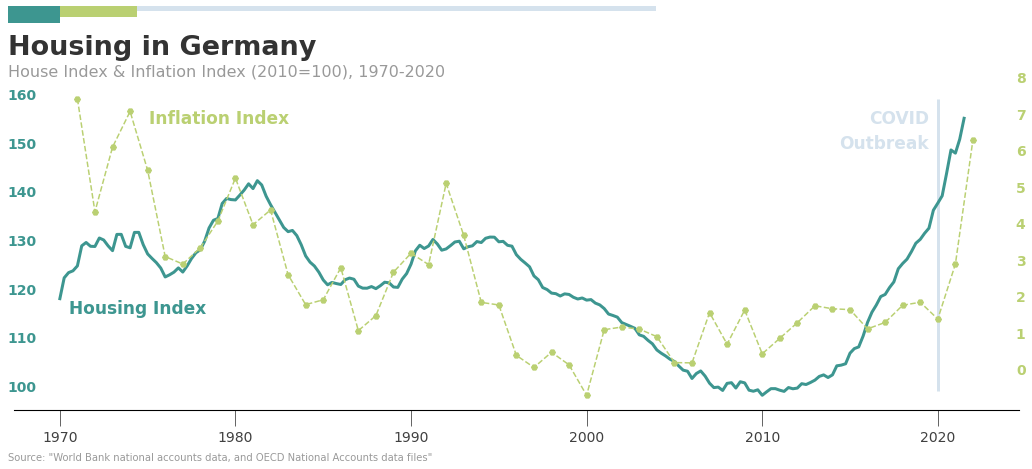

In [5]:
# setup plot size
fig, ax1 = plt.subplots(figsize=(18,6))
fig.patch.set_facecolor('xkcd:white')
ax2 = ax1.twinx() #to have 2 y-axis

# DATA
# draw the line curve of TMAX
ax1.plot_date(df['observation_date'], df['index'], '-', color='#3d9690', lw=3)
ax2.plot_date(df1.index, df1['Inflation Index'], '--H', color='#bad072', lw=1.5)

# ASTHETICS
# Remove splines. Can be done one at a time or can slice with a list.
for spine in ['top', 'right', 'left']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

ax1.spines['bottom'].set_linewidth(1.1)
ax1.spines['bottom'].set_capstyle('projecting')

# Remove ticks
ax1.tick_params(left = False)
ax2.tick_params(right = False)

# Reformat y-axis tick labels
ax1.set_yticklabels(np.arange(90,170,10),       # Set labels again
                   fontdict={'fontweight':'heavy'},
                   ha = 'left',                 # Set horizontal alignment to right
                   verticalalignment='baseline')  # Set vertical alignment to make labels on top of gridline   
ax2.set_yticklabels(np.arange(-1,10,1),  
                   fontdict={'fontweight':'heavy'},     
                   ha = 'right',                 
                   verticalalignment='bottom')

ax1.tick_params(axis='y', labelsize=14, colors='#3d9690')
ax2.tick_params(axis='y', labelsize=14, colors='#bad072')
ax1.tick_params(axis='x', labelsize=14, size= 16, colors='#404040')


# ANNOTATION
# Label
ax1.text(x=pd.to_datetime('2019-06-30'), y=155, s='COVID',ha='right',color='#d5e2ed',fontsize=17, fontweight='heavy')
ax1.text(x=pd.to_datetime('2019-06-30'), y=150, s='Outbreak',ha='right',color='#d5e2ed',fontsize=17, fontweight='heavy')
ax1.text(x=pd.to_datetime('1970-06-30'), y=116, s='Housing Index',ha='left',color='#3d9690',fontsize=17, fontweight='heavy')
ax1.text(x=pd.to_datetime('1975-01-30'), y=155, s='Inflation Index',ha='left',color='#bad072',fontsize=17, fontweight='heavy')
ax2.text(x=0.12, y=.95, s="Housing in Germany", transform=fig.transFigure, ha='left', fontsize=27, weight='bold', alpha=.8)
ax2.text(x=0.12, y=.90, s="House Index & Inflation Index (2010=100), 1970-2020", transform=fig.transFigure, ha='left', fontsize=16, alpha=.4)

# Set source text
ax2.text(x=0.12, y=0.01,
        s='Source: "World Bank national accounts data, and OECD National Accounts data files"',
        transform=fig.transFigure, ha='left', fontsize=10, alpha=.4)


# SHAPES
# add vertical line
ax1.vlines(x=pd.to_datetime('2020-01-01'), ymin=100, ymax=160, color='#d5e2ed', lw=3)

# add in lines 
ax2.add_patch(plt.Rectangle((0.12,1.06),                 # Set location of rectangle by lower left corder
                           0.04,-0.04,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#3d9690', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax2.add_patch(plt.Rectangle((0.16,1.06),                 # Set location of rectangle by lower left corder
                           0.06,-0.025,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#bad072', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax2.add_patch(plt.Rectangle((0.22,1.06),                 # Set location of rectangle by lower left corder
                           0.4,-0.01,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#d5e2ed', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

plt.savefig('Housing in Germany.png') 
fig.show()



- Region: Germany
- domain category: Housing Prices and Inlfation
- Research Question: 


1) How can Inflation affect House Pricing?

2) Does COVID Outbreak have any effect on Housing Price?

- Links:

Inflation rate:

https://databank.worldbank.org/source/world-development-indicators

Real Residential Property Prices for Germany:

https://fred.stlouisfed.org/



* Cairo's principle:

**Truthfulness**: Took data from a credible source, and added all the data points. The visualization is not based on fabricated data or manipulated data work.

**Beauty**:  The visualization is aesthetically enjoyable.The choice of colors, background, lines, and shapes is cohesive.

**Functionality**: The visualization allows the reader to get a meaningful understanding of the data.

**Insightfulness**: We Gained an important insight, that is, both factors share same trend.


# References

Inflation rate:

https://databank.worldbank.org/source/world-development-indicators

Real Residential Property Prices for Germany:

https://fred.stlouisfed.org/

